* This module's about (i) why we should care about data vis, (ii) learning to question what makes 'good' data vis, and (iii) talk about software for data vis.

# Activity from first slide deck

1. **Life Expectancy plot**: Difficult to understand what's happening here. This should be a two-dimensional plot, and it's not pleasing to look at. It's not an accurate representation because it's hard to see where the bars line up against each other in, e.g., Europe and Oceania. We can understand that some countries are lower than others, but that's pretty much it. Even the colours are misleading: A reader would typically associate red with a more negative outcome. The axes and size of the labels are also difficult to read and look inconsistent (eg. X-axis in title case, Y-axis in all caps) It's not a good data visualization.

2. **Monstrous Costs**: Not pleasing to look at. It's difficult to tell what the exact comparisons are between, e.g., 1972 and 1974, since the background doesn't align with these "bars". It's *somewhat* clear - especially with the general context of the photo - that the maker is trying to communicate very expensive estimated costs for the 1982 election campaign, but it's still not an easy plot to read at the exact data point level (e.g., what is the value for 1976 against the skewed background?). It's definitely an interesting visualization and has fewer colours than the previous one, but it's still not a good visualization. It also has some odd aspect ratios (as we see on slide 22!).

3. **2012 Presidential Run**: This one is classic and one I see often when I'm grading undergraduate Statistics assignments on bad visualization. It's not pleasing to look at for many reasons: The blue pie against the same blue background, the % value alignments, the misrepresentation of the data (and in fact, it doesn't even add up to 100%), and it's also not entirely clear who's surveyed (apart from the "opinions" source). It doesn't accurately represent the data - we don't know what the total population is. It's not too clear what the message is here. This is a bad visualization for all of these reasons.

4. **Wind Map**: This one looks better than the above ones - there is more information to look at and it's clear that this is about weather information, so the map and visualization make sense. As an interactive image, it makes more sense as you can see the flow. It does represent data accurately, but as a static image, it's difficult to see nuanced differences between, for example, 3 mph and 5 mph areas. There aren't clear enough boundaries between each possible value in the legend. Colour would greatly benefit this plot to better differentiate these more difficult-to-see differences and would make it a much better visualization.

### Making a basic figure with `matplotlib`

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

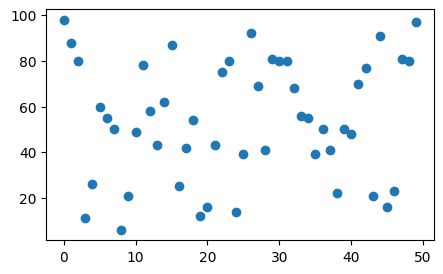

In [2]:
# Create sample data
np.random.seed(613)
x = np.arange(50)
y = np.random.randint(0, 100,50)

# Make basic scatterplot
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x,y)


<BarContainer object of 50 artists>

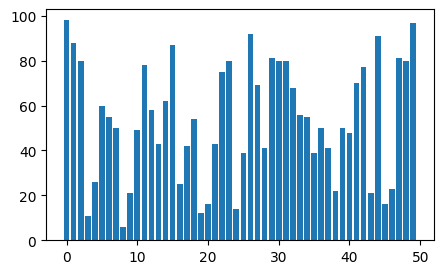

In [5]:
# Bar plot on same data
fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(x,y)

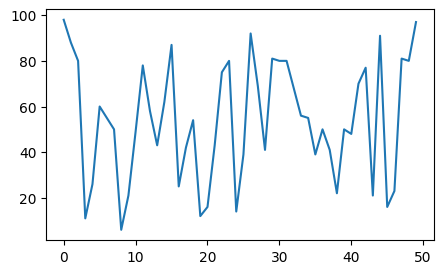

In [6]:
# Line plot on same data
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x,y)

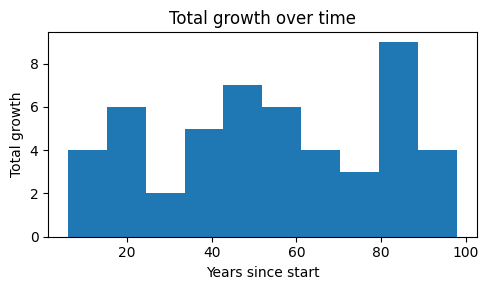

In [15]:
# Activity: Produce a histogram
fig, ax = plt.subplots(figsize=(5, 3))
ax.hist(y)

# Adding labels
ax.set_title("Total growth over time")
ax.set_xlabel("Years since start")
ax.set_ylabel("Total growth")  
fig.tight_layout()

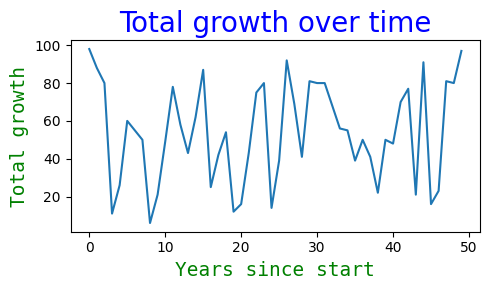

In [16]:
# Modifying labels

## Make dictionary with properties for our labels
font1 = {'family':'sans-serif','color':'blue','size':20}
font2 = {'family':'monospace','color':'green','size':14}

## Now add font dictionaries to previous line plot
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x,y)
ax.set_title('Total growth over time', fontdict = font1)
ax.set_ylabel('Total growth', fontdict = font2)
ax.set_xlabel('Years since start', fontdict = font2)
fig.tight_layout()

/var/folders/7y/hcqkqtxn3_sdc0gtn_ng23fm0000gn/T/ipykernel_35601/4222455373.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


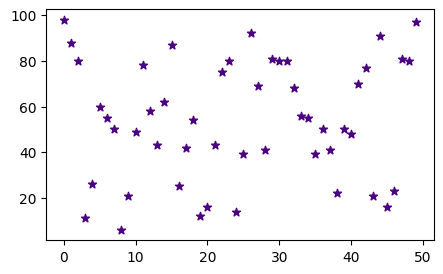

In [21]:
# Modifying data points: Adding colour and marker arguments
## Note that it uses US spelling!

fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x,
           y,
           marker='*', # NEW ADDITIONS
           color = "indigo") # NEW ADDITIONS
fig.show()


/var/folders/7y/hcqkqtxn3_sdc0gtn_ng23fm0000gn/T/ipykernel_35601/2411333536.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


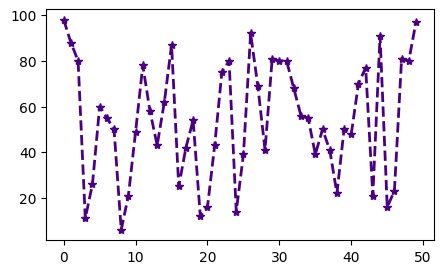

In [22]:
# We can also change style and width of the line connecting points
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x,
        y,
        marker='*',
        color = 'indigo',
        linestyle = '--', # NEW ADDITIONS
        linewidth = 2) # NEW ADDITIONS
fig.show()

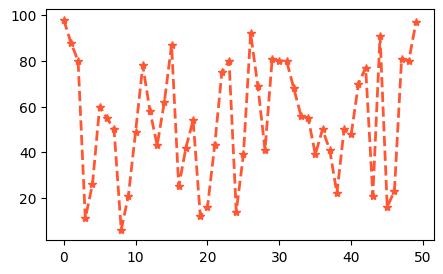

In [26]:
# Modify colour using named 'colors' or hex codes

fig, ax = plt.subplots(figsize=(5, 3))

# colour is the new addition here
ax.plot(x,y,marker='*', color='#FF5733', linestyle='--', linewidth=2)

/var/folders/7y/hcqkqtxn3_sdc0gtn_ng23fm0000gn/T/ipykernel_35601/152017011.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


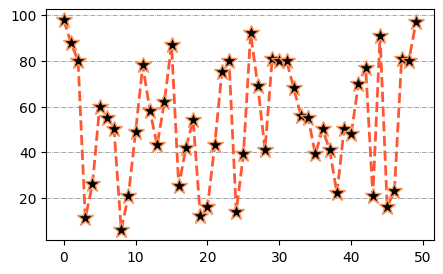

In [ ]:
# More customization!
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x,
        y,
        marker='*',
        markersize = 12, # NEW ADDITIONS
        color = '#FF5733',
        linestyle = '--',
        linewidth = 2,
        markeredgecolor = '#fa9359', # NEW ADDITIONS
        markerfacecolor = '#000000') # NEW ADDITIONS
ax.grid(axis='y', 
        color="grey", 
        linewidth=.5, 
        linestyle="-.") # add grid lines using .grid()
fig.show()

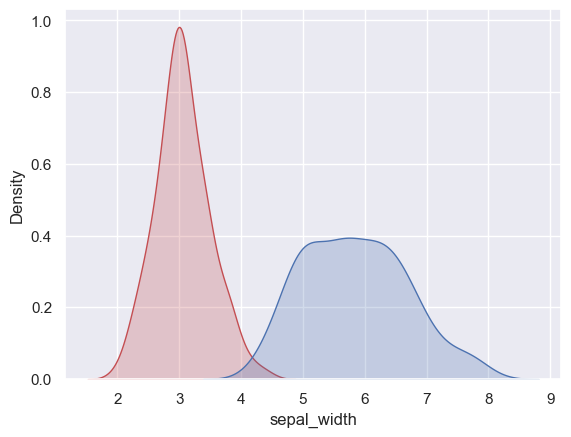

In [39]:
# Activity: Python Graph Gallery

# Choosing multiple density plots
import seaborn as sns

df = sns.load_dataset('iris')
sns.set_theme(style="darkgrid")
sns.kdeplot(df['sepal_width'], fill=True, color="r")
sns.kdeplot(df['sepal_length'], fill=True, color="b")
plt.show()

My visualization succeeds in all three areas, which is why I use them often in my own research. First, they're aesthetically pleasing and show overlapping data with opacity alphas in a clear way. The visualization gives the reader a good sense of the data in terms of its shape (ie. is it a broad range? is it narrow? what are the extremes like?), making it substantive. Finally, the perceptual message is clear: what is the density of values of a given variable? (though this plot in particular would benefit from a legend!).